In [32]:
!pip install opendatasets --upgrade --quiet


In [33]:
import opendatasets as od
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: ./stackoverflow-developer-survey-2020/survey_results_public.csv
Using downloaded and verified file: ./stackoverflow-developer-survey-2020/survey_results_schema.csv
Using downloaded and verified file: ./stackoverflow-developer-survey-2020/README.txt


In [34]:
import os

In [35]:
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

In [36]:
import pandas as pd
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [37]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [38]:
 survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [39]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [40]:
schema_raw

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


In [41]:
type (schema_raw)

pandas.core.series.Series

In [42]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

##Data load completed

##Data Preperation & Cleaning

In [116]:
selected_columns = [
    #Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    #Programming experience
    'Hobbyist',
    'Age1stCode', # Corrected column name
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    #Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt', # Corrected column name
    'ConvertedComp' # Include ConvertedComp
]

In [44]:
len(selected_columns)

20

In [45]:
survey_df = survey_raw_df[selected_columns].copy()

In [46]:
schema = schema_raw[selected_columns]

In [47]:
survey_df.shape

(64461, 20)

In [48]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [49]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [50]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')

In [51]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,57473.000000,57473.000000,41151.000000
mean,30.834111,15.476572,15.476572,15.476572,40.782174
std,9.585392,5.114081,5.114081,5.114081,17.816383
min,1.000000,5.000000,5.000000,5.000000,1.000000
25%,24.000000,12.000000,12.000000,12.000000,40.000000
50%,29.000000,15.000000,15.000000,15.000000,40.000000
75%,35.000000,18.000000,18.000000,18.000000,44.000000
max,279.000000,85.000000,85.000000,85.000000,475.000000


In [52]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

In [53]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs>140].index, inplace=True)

In [54]:
survey_df['Gender'].value_counts()

,count
Gender,
Man,45895
Woman,3835
"Non-binary, genderqueer, or gender non-conforming",385
"Man;Non-binary, genderqueer, or gender non-conforming",121
"Woman;Non-binary, genderqueer, or gender non-conforming",92
Woman;Man,73
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",25


In [55]:
import numpy as np

#Explanation of the code:

* **`survey_df.where(~(survey_df.Gender.str.contains(',', na=False)), np.nan, inplace=True)`:**
    * This is the core cleaning step.
    * It checks if each 'Gender' entry contains a comma (`,`), which indicates multiple selections.
    * `~` (tilde) inverts this check: so it becomes `True` for single selections and `False` for multiple selections.
    * The `where()` method then replaces 'Gender' values with `np.nan` (missing) wherever the condition is `False` (i.e., for multiple selections).
    * `inplace=True` applies these changes directly to `survey_df`.
    * **Result:** All 'Gender' entries with multiple selections are changed to `NaN`, simplifying future analysis.

In [56]:
survey_df.where(~(survey_df.Gender.str.contains(',', na=False)), np.nan, inplace=True)

In [57]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
27215,Romania,NaN,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,15.0,15.0,15.0,Bash/Shell/PowerShell;C++;Haskell;HTML/CSS;Jav...,Go;JavaScript;Python;Rust;TypeScript,Every few months,Visit Stack Overflow;Watch help / tutorial vid...,Employed part-time,"Designer;Developer, front-end",22.0,Neither satisfied nor dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
10174,Sri Lanka,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,20.0,20.0,20.0,C;C#;C++;Dart;HTML/CSS;Java;JavaScript;PHP;Pyt...,Dart;HTML/CSS;JavaScript;PHP;Python;SQL;TypeSc...,Every few months,Play games;Visit Stack Overflow;Watch help / t...,Employed part-time,"Designer;Developer, back-end;Developer, front-...",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Fairly important
20534,United States,29.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,12.0,12.0,12.0,Bash/Shell/PowerShell;C;C#;C++;Go;HTML/CSS;Jav...,C#;C++;HTML/CSS;SQL;TypeScript,Every few months,Meditate;Call a coworker or friend;Go for a wa...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Not at all important/not necessary
41075,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,21.0,21.0,21.0,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Java;JavaScript;Python,Every few months,Go for a walk or other physical activity,Employed full-time,"Developer, full-stack",9.0,Neither satisfied nor dissatisfied,NaN,Rarely: 1-2 days per year or less,Very important
43841,India,22.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,12.0,12.0,12.0,HTML/CSS;JavaScript;TypeScript,Go;SQL,Every few months,Visit Stack Overflow;Do other work and come ba...,Employed full-time,"Developer, full-stack;Educator",45.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Occasionally: 1-2 days per quarter but less th...,Somewhat important
25355,United States,NaN,Man,"Associate degree (A.A., A.S., etc.)","Computer science, computer engineering, or sof...",Yes,25.0,25.0,25.0,C#;HTML/CSS;JavaScript;SQL;VBA,C#;JavaScript;SQL,Once a year,Play games;Visit Stack Overflow;Go for a walk ...,Employed full-time,"Developer, full-stack",40.0,Very satisfied,Flex time or a flexible schedule;Remote work o...,Occasionally: 1-2 days per quarter but less th...,Somewhat important
39496,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",No,17.0,17.0,17.0,Bash/Shell/PowerShell;Java,Kotlin;TypeScript,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end",NaN,Slightly satisfied,NaN,NaN,Fairly important
18128,Ukraine,44.0,Man,"Secondary school (e.g. American high school, G...",NaN,No,38.0,38.0,38.0,HTML/CSS;JavaScript,NaN,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, front-end",40.0,Slightly satisfied,NaN,Sometimes: 1-2 days per month but less than we...,Somewhat important
59877,Sweden,22.0,Man,"Associate degree (A.A., A.S., etc.)","Computer science, computer engineering, or sof...",Yes,14.0,14.0,14.0,Dart;HTML/CSS;Java;JavaScript;Python,Dart;HTML/CSS;JavaScript;TypeScript,Once a year,Meditate;Go for a walk or other physical activ...,Employed full-t

#Exploratory Analysis and Visualization

In [58]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Country

In [59]:
schema.Country

'Where do you live?'

In [60]:
survey_df.Country.nunique()

183

In [61]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

,count
Country,
United States,12246
India,8371
United Kingdom,3847
Germany,3836
Canada,2155
France,1866
Brazil,1800
Netherlands,1326
Poland,1257


We can visualize this information using a bar chart.

/tmp/ipython-input-62-179724052.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries, palette='Set1')


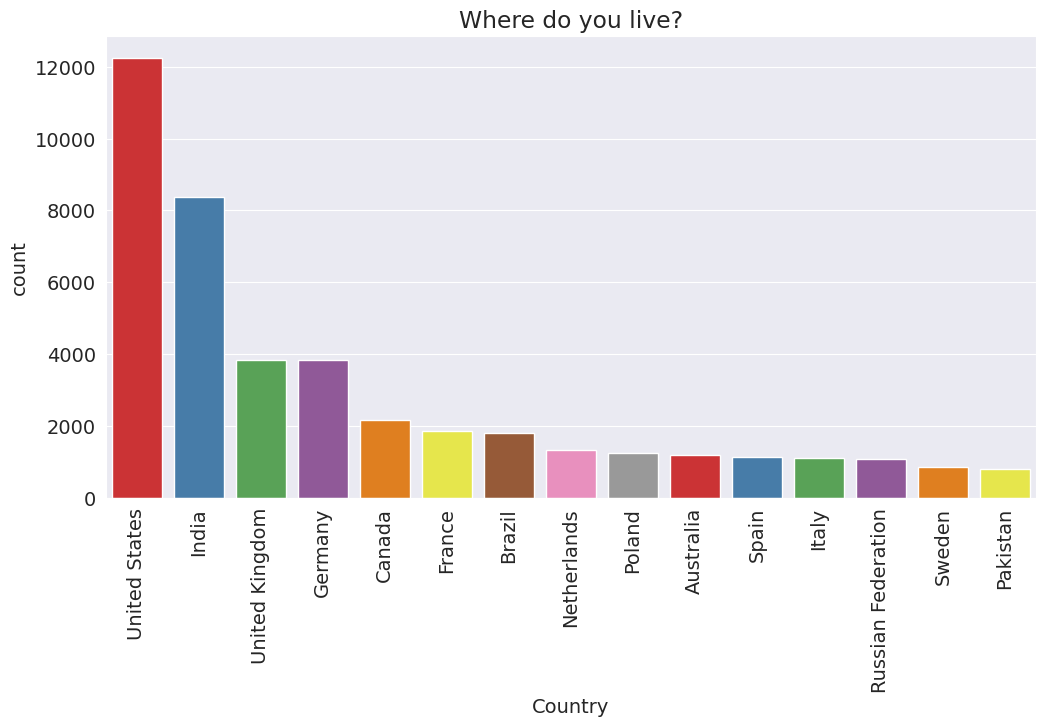

In [62]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries, palette='Set1')
plt.show()

### Age

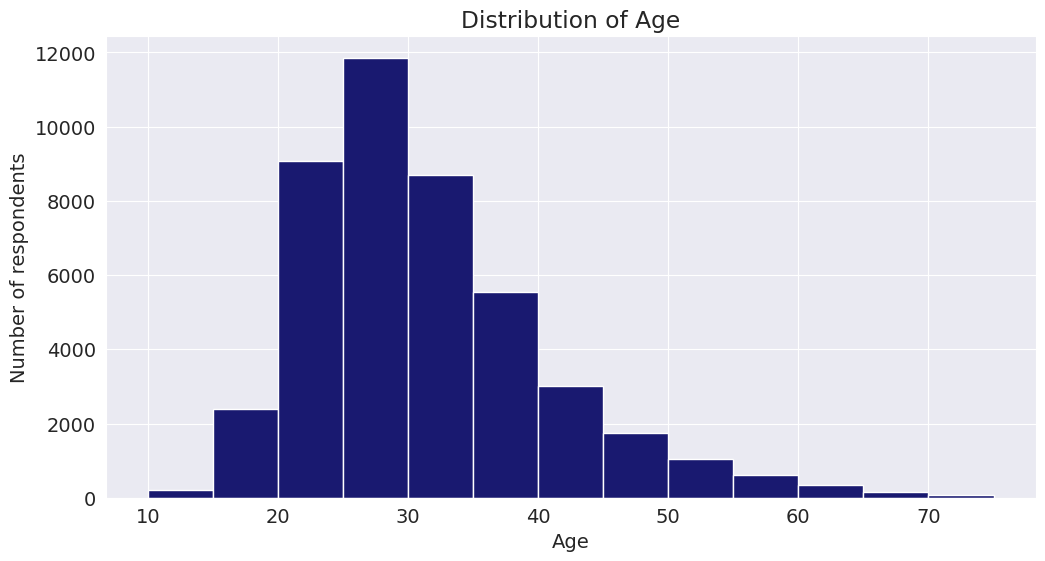

In [63]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10, 80, 5), color='midnightblue')
plt.show()

In [64]:
import plotly.express as px

In [65]:
px.histogram(survey_df, x="Age", marginal="box", title='Age of Respondents')

### Gender

In [66]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [67]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

,count
Gender,
Man,45895
Woman,3835
Woman;Man,73


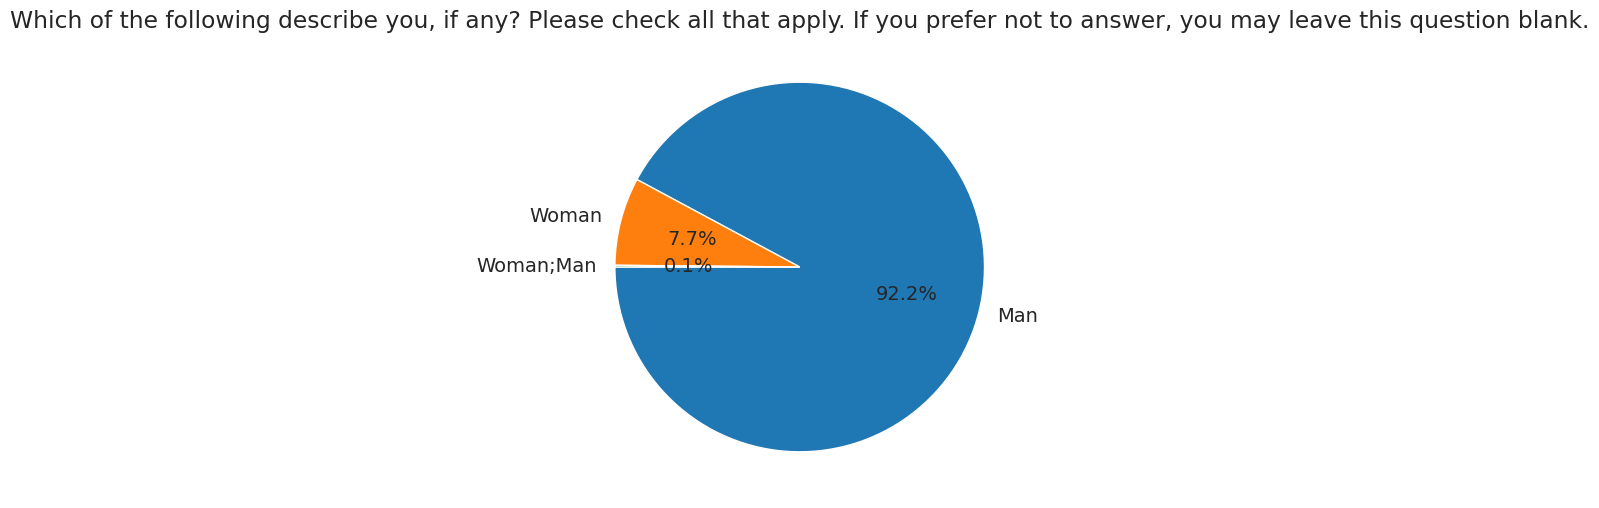

In [68]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

autopct='%1.1f%%'

This formats the percentage displayed on each slice. It shows the percentage with one decimal place, followed by a percent sign (e.g., "55.3%").

### Education Level

In [69]:
survey_df.EdLevel

,EdLevel
0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
2,NaN
3,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
...,...
64456,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
64457,NaN
64458,Primary/elementary school
64459,NaN


In [74]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

/tmp/ipython-input-75-2191908754.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




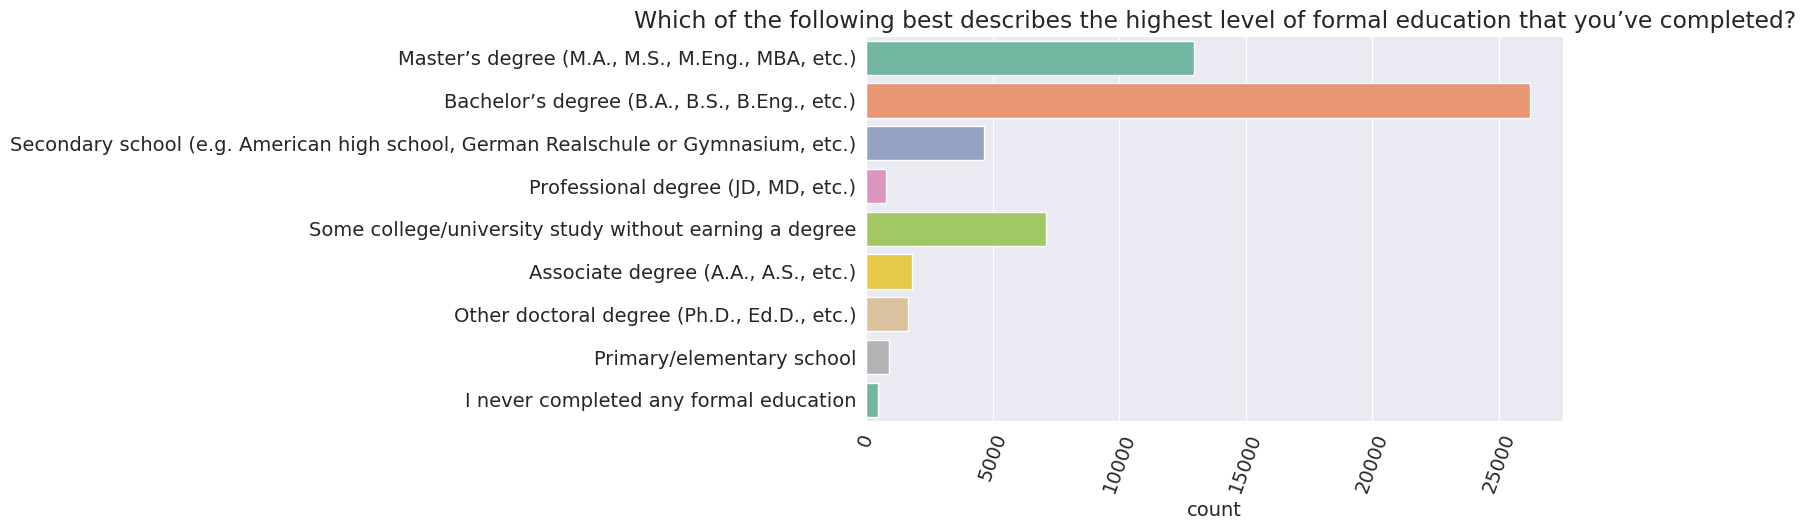

In [75]:
sns.countplot(y=survey_df.EdLevel, palette='Set2')
plt.xticks(rotation=70)
plt.title(schema['EdLevel'])
plt.ylabel(None)
plt.show();

In [76]:
schema.UndergradMajor

'What was your primary field of study?'

/tmp/ipython-input-80-1448642770.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'What was your primary field of study?')

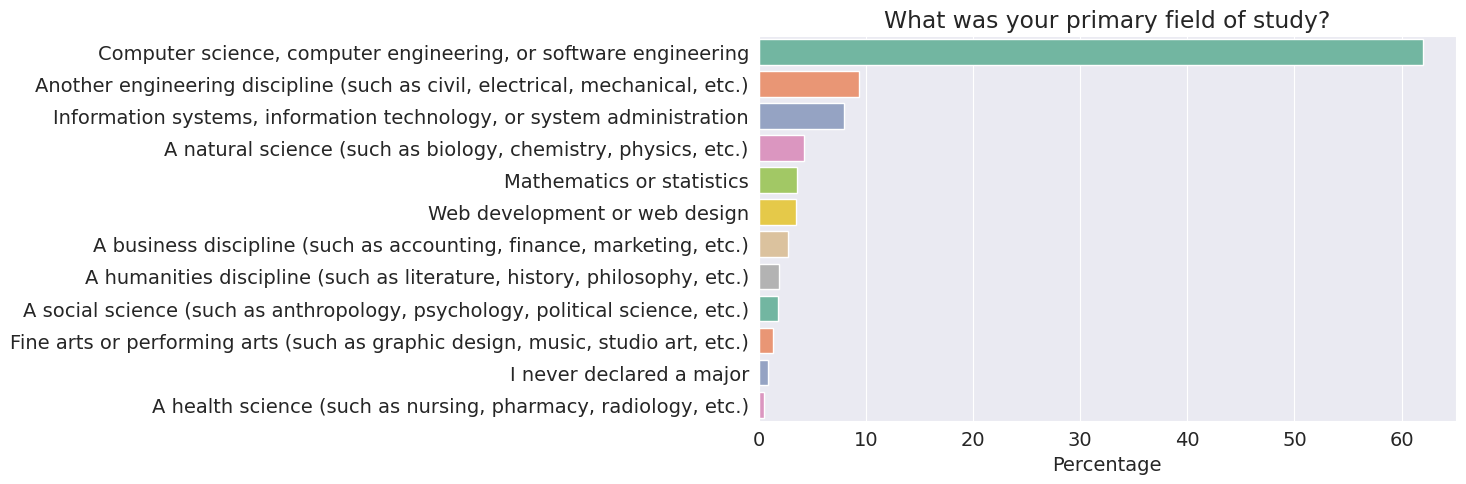

In [80]:
Undergrad_pct = survey_df.UndergradMajor.value_counts()*100/ survey_df.UndergradMajor.count()

sns.barplot(x=Undergrad_pct, y=Undergrad_pct.index, orient='h', palette='Set2')
plt.xlabel('Percentage')
plt.ylabel(None)
plt.title(schema.UndergradMajor)

### Employment

In [81]:
schema.Employment

'Which of the following best describes your current employment status?'

In [82]:
survey_df.Employment.value_counts()

,count
Employment,
Employed full-time,44751
Student,7680
"Independent contractor, freelancer, or self-employed",5602
"Not employed, but looking for work",2316
Employed part-time,2183
"Not employed, and not looking for work",312
Retired,240


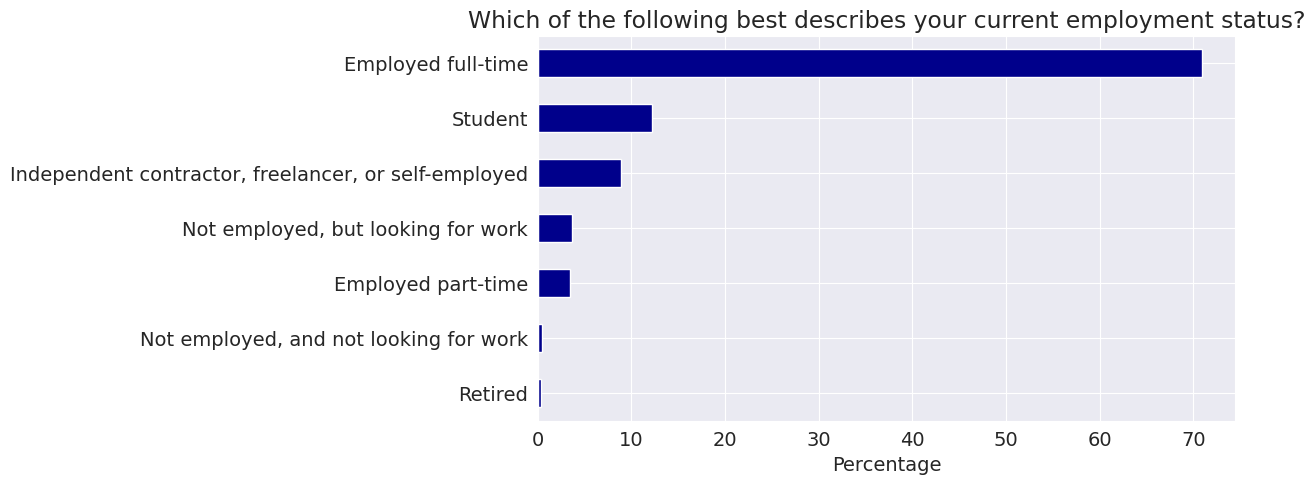

In [83]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='darkblue', title=schema.Employment)

plt.title(schema.Employment)
plt.ylabel(None)
plt.xlabel('Percentage')
plt.show()

for everyones job title

In [85]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [86]:
survey_df.DevType.value_counts()

,count
DevType,
"Developer, full-stack",4378
"Developer, back-end",3046
"Developer, back-end;Developer, front-end;Developer, full-stack",2201
"Developer, back-end;Developer, full-stack",1459
"Developer, front-end",1386
...,...
"Data or business analyst;Database administrator;Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Developer, QA or test;Educator;Engineer, data;Engineer, site reliability;System administrator",1
"Developer, back-end;Developer, front-end;Developer, full-stack;DevOps specialist;Engineer, data;Engineering manager",1
"Data scientist or machine learning specialist;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Developer, mobile;Engineer, data;Engineer, site reliability;Engineering manager",1


Let's define a helper function that turns a column containing lists of values (like `survey_df.DevType`) into a data frame with one column for each possible option.

In [98]:
def split_multicolumn(col_series):
  result_df = col_series.to_frame()
  options = []
  for idx, value in col_series[col_series.notnull()].items():
    for option in value.split(';'):
      # Check if the option is already in the list
      if not option in result_df.columns:
        # If not, add it to the list
        options.append(option)
        # Create a new column for this option and
        result_df[option] = False
      # Set the value in the new column for the current row
      result_df.at[idx, option] = True
  return result_df[options]

In [100]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [101]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


###now we have to take column wise sum to know number of job profiles

In [102]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

,0
"Developer, back-end",26871
"Developer, full-stack",26778
"Developer, front-end",18046
"Developer, desktop or enterprise applications",11640
"Developer, mobile",9379
DevOps specialist,5875
Database administrator,5635
Designer,5238
System administrator,5145
"Developer, embedded applications or devices",4680


if i want to know number of Data scientist in from dev_type_totals using pandas

In [109]:
# prompt: if i want to know number of Data scientist in from dev_type_totals using pandas

data_scientist_count = dev_type_totals['Data scientist or machine learning specialist']
data_scientist_count

np.int64(3921)

###Compensation vs. Working Hours

In [119]:
survey_df.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt'],
      dtype='object')

In [123]:
usa_df = survey_df[survey_df.Country.isin(['United States','India'])]
px.scatter(usa_df, x='WorkWeekHrs', color='Country')

In [124]:
px.histogram(survey_df, x="WorkWeekHrs", title='Hours of Work Per Week', nbins=40)

## Asking and Answering Questions

#### Q: What are the most popular programming languages in 2020?

In [126]:
survey_df.LanguageWorkedWith

,LanguageWorkedWith
0,C#;HTML/CSS;JavaScript
1,JavaScript;Swift
2,Objective-C;Python;Swift
3,NaN
4,HTML/CSS;Ruby;SQL
...,...
64456,NaN
64457,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458,NaN
64459,HTML/CSS


In [127]:
survey_df.LanguageDesireNextYear

,LanguageDesireNextYear
0,C#;HTML/CSS;JavaScript
1,Python;Swift
2,Objective-C;Python;Swift
3,NaN
4,Java;Ruby;Scala
...,...
64456,NaN
64457,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458,NaN
64459,HTML/CSS;Java;JavaScript


we'll split this column into a data frame containing a column of each language listed in the options.

In [128]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [129]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False)*100
languages_worked_percentages

,0
JavaScript,59.555873
HTML/CSS,55.475383
SQL,48.211675
Python,38.708674
Java,35.453923
Bash/Shell/PowerShell,28.995739
C#,27.673934
PHP,23.047616
TypeScript,22.346282
C++,21.012036


Text(0.5, 0, 'count')

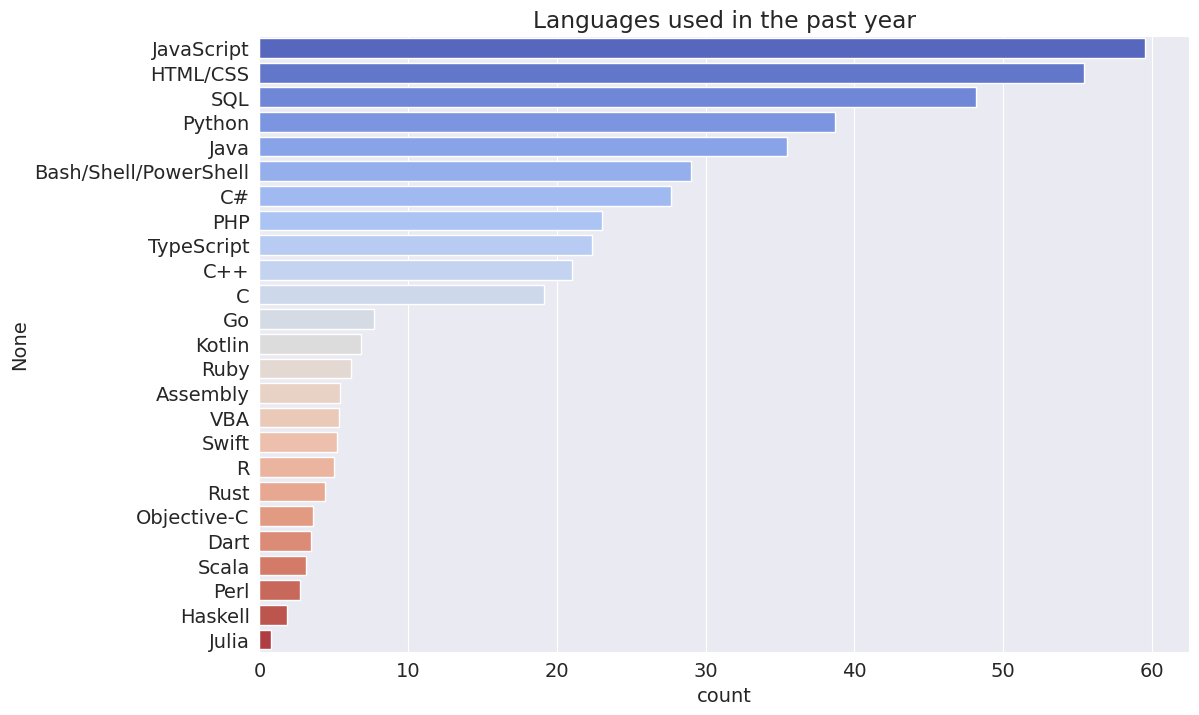

In [135]:
from typing import Any
plt.figure(figsize=(12,8))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index,  palette='coolwarm')
plt.title("Languages used in the past year")
plt.xlabel('count')

#### Q: Which languages are the most people interested to learn over the next year?

In [136]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False)*100
languages_interested_percentages

,0
Python,40.888875
JavaScript,40.220197
HTML/CSS,31.819737
SQL,30.622337
TypeScript,26.313252
C#,20.954499
Java,20.393120
Go,19.313905
Bash/Shell/PowerShell,17.898796
Rust,16.113582


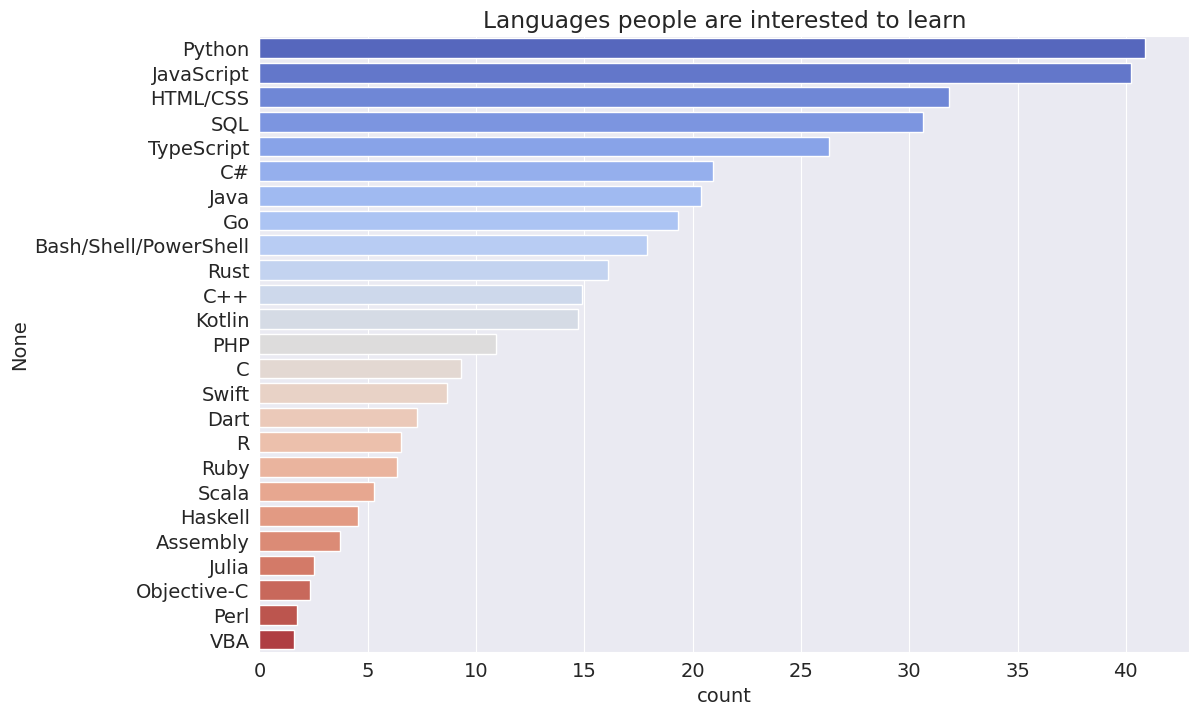

In [138]:
plt.figure(figsize=(12,8))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index,  palette='coolwarm')
plt.title("Languages people are interested to learn")
plt.xlabel('count');

#### Q:  Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?


In [139]:
languages_loved_df = languages_worked_df & languages_interested_percentages
languages_loved_df

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [144]:
languages_loved_percentages  = (languages_loved_df.sum() * 100 / languages_worked_percentages.sum()).sort_values(ascending=False)
languages_loved_percentages

,0
JavaScript,8679.960343
HTML/CSS,8085.250020
SQL,7026.602186
Python,5641.588930
Java,5167.225857
Bash/Shell/PowerShell,4225.978917
C#,4033.332661
PHP,3359.070767
TypeScript,3256.854931
C++,3062.395534


/tmp/ipython-input-145-2975836246.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




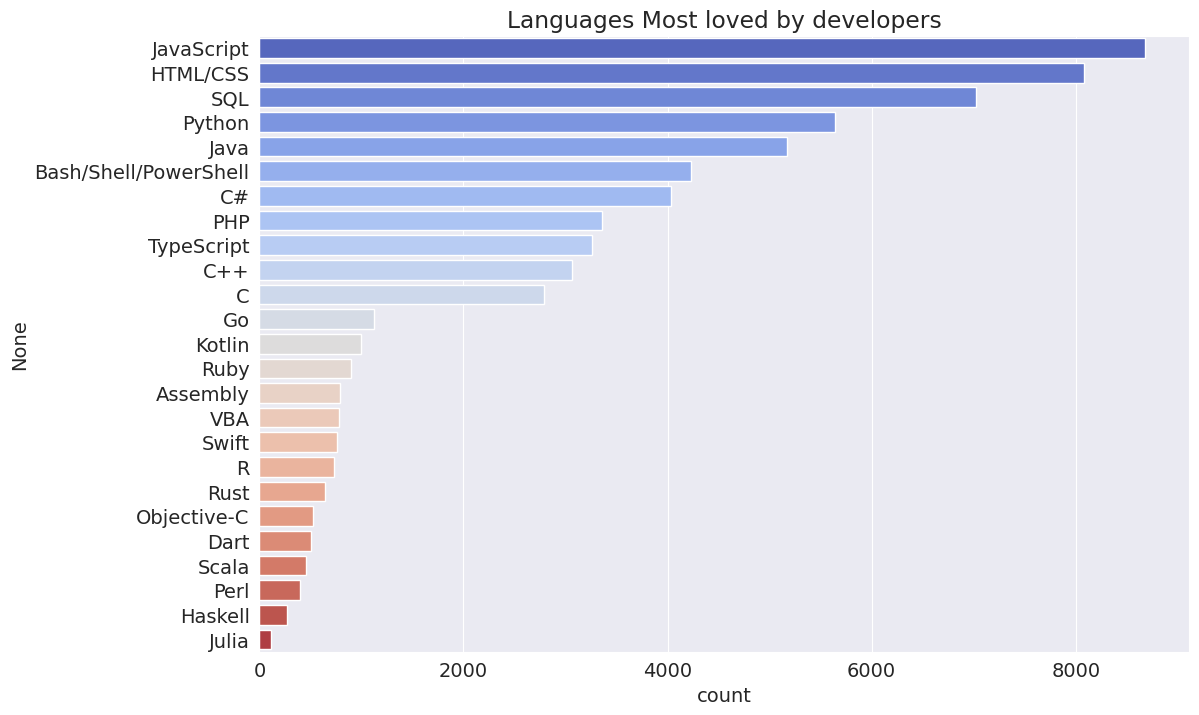

In [145]:
plt.figure(figsize=(12,8))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index,  palette='coolwarm')
plt.title("Languages Most loved by developers")
plt.xlabel('count');

#### Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

In [149]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values(by='WorkWeekHrs', ascending=False)

In [150]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts()>250].head(15)

In [151]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.446667
Israel,43.912322
China,42.134752
United States,41.815932
Viet Nam,41.391667
Greece,41.170588
South Africa,41.017699
Turkey,40.974388
Sri Lanka,40.496552


/tmp/ipython-input-156-2137508564.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




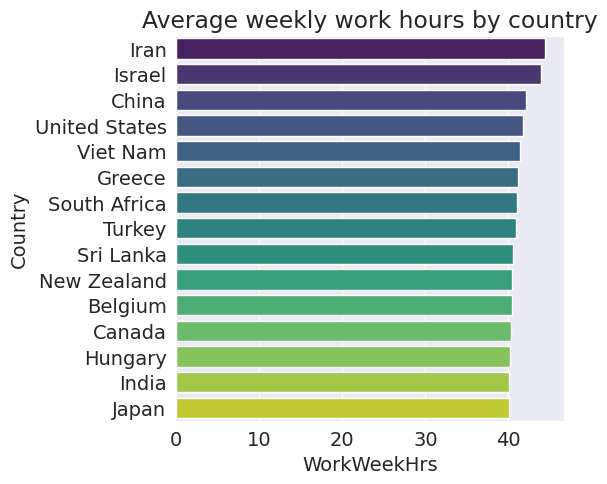

In [156]:
# prompt: plot countries in  y axis also use color palette

plt.figure(figsize=(5,5))
sns.barplot(y=high_response_countries_df.index, x=high_response_countries_df.WorkWeekHrs, palette='viridis')
plt.title('Average weekly work hours by country')
plt.xlabel('WorkWeekHrs')
plt.ylabel('Country')
plt.show()

#### Q: How important is it to start young to build a career in programming?


In [157]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

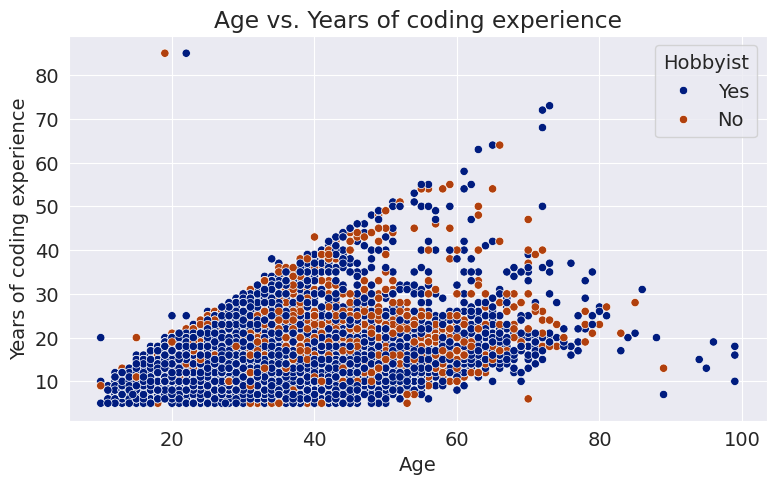

In [161]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df, palette='dark')
plt.xlabel("Age")
plt.ylabel("Years of coding experience")
plt.title("Age vs. Years of coding experience")
plt.show()

/tmp/ipython-input-171-2620552216.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




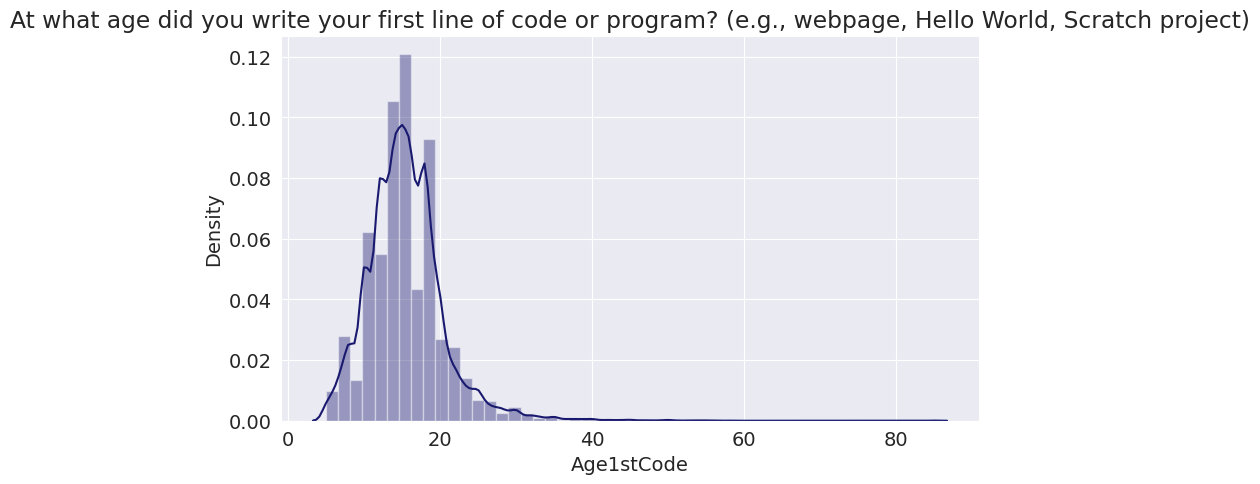

In [171]:
plt.title(schema.Age1stCode)
sns.distplot(survey_df.Age1stCode, color='midnightblue');
#bins=(10),

The seaborn.distplot function was a common tool in the Seaborn library for visualizing the distribution of a univariate dataset. It combined a histogram with a Kernel Density Estimate (KDE) plot and, optionally, a rug plot.